In [20]:
# 超参数
COLS_Y1= '305_price'
COLS_Y2= 'perRefuelLiters'
COLS_X = 'date'

COLS_ALL = ['date', '305_order_cnt', '305_amount', '305_refuelLiters', '305_price', 'high', 'week', 'holidays']

import pandas as pd

# 读取excel文件并获取指定列
#df_uncleaned = pd.read_csv('Data/结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL)
df_uncleaned = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL, encoding='GBK')
# 删除包含空值的行
df = df_uncleaned.dropna()


df[COLS_Y2] = df['305_refuelLiters'] / df['305_order_cnt']

df = df.head(365)
print(df.head())


       date  high week holidays  305_price  305_order_cnt   305_amount  \
0  2023-1-1     8  星期日       元旦       7.54         546095  123147634.4   
1  2023-1-2     9  星期一       元旦       7.54         635905  144261568.3   
2  2023-1-3     9  星期二       平时       7.54         700728  160083029.5   
3  2023-1-4    12  星期三       平时       7.74         499980  114163925.4   
4  2023-1-5    13  星期四       平时       7.74         514479  117201013.4   

   305_refuelLiters  perRefuelLiters  
0       16307411.16        29.861858  
1       19102708.45        30.040192  
2       21199890.56        30.254094  
3       14725749.74        29.452678  
4       15118148.18        29.385355  


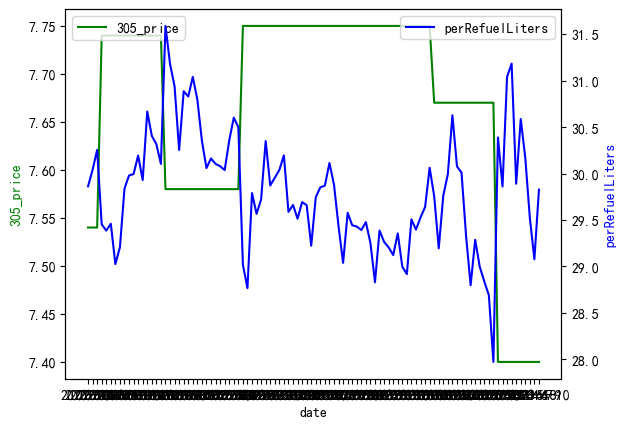

In [21]:
# 双折线图

import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 创建一个图表和轴对象
fig, ax1 = plt.subplots()

# 绘制第一条曲线
ax1.plot(df[COLS_X], df[COLS_Y1], 'g-', label=COLS_Y1)
ax1.set_xlabel(COLS_X)
ax1.set_ylabel(COLS_Y1, color='g')

# 利用twinx()创建第二个Y轴
ax2 = ax1.twinx()

# 绘制第二条曲线
ax2.plot(df[COLS_X], df[COLS_Y2], 'b-', label=COLS_Y2)
ax2.set_ylabel(COLS_Y2, color='b')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图表
plt.show()